# Regression Intro

In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np 
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [2]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  8.072956    0.324968   44659000.0  214.005615
2004-08-20   54.322689  7.921706    7.227007   22834300.0  210.725489
2004-08-23   54.869377  4.049360   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  7.657099   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  3.886792    1.183658    9188600.0  223.309335


In [3]:
X = np.array(df.drop(['label'], 1))

X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X), len(y))

3081 3081


In [4]:
X_train, X_test,  y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# using linear regression classifier
clf = LinearRegression()
#clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(accuracy)

0.8871170619836852


In [5]:
# using support vector machine classifier

#clf = svm.SVR()
#clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(accuracy)

0.8871170619836852


In [6]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [7]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 967.86260682  959.89179321  976.26352196  984.84422438  985.58739537
  978.45916455  985.00834149  984.8928165   983.54351873  975.05461177
  995.53459372  991.33925112  980.00049143  971.60275731  960.87237595
  979.43232063  975.43622497 1000.33880429  998.37970516 1016.66052948
 1010.32758101 1023.81111598 1026.48713689 1023.21021161 1015.03395247
 1020.65238612 1018.51635857 1018.8804834  1011.38937821 1010.1236116
 1016.38416368 1009.77609555 1005.30471578  996.71710406 1017.04301308
 1012.27911081 1017.90930339 1040.69984284 1036.00239918 1032.5340664
 1039.15923675 1039.45200113 1037.60431385 1034.63292232 1035.98026802
 1032.88150845 1033.70946808 1063.37837429 1063.72815697 1074.69398791
 1071.94659246 1068.75943745 1035.55912632 1027.48853678 1022.61144214
 1027.99089138 1025.29337374 1028.58463472 1038.21942786 1039.67268695
 1036.85308405 1043.66607715 1047.87841262 1049.67145232 1045.74191222
 1052.18414758 1058.64065138 1060.81154918 1064.69509196 1066.48892707
 1058.66

            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label  \
Date                                                                    
2004-08-19   50.322842  8.072956    0.324968   44659000.0  214.005615   
2004-08-20   54.322689  7.921706    7.227007   22834300.0  210.725489   
2004-08-23   54.869377  4.049360   -1.227880   18256100.0  208.072299   
2004-08-24   52.597363  7.657099   -5.726357   15247300.0  218.288837   
2004-08-25   53.164113  3.886792    1.183658    9188600.0  223.309335   

            Forecast  
Date                  
2004-08-19       NaN  
2004-08-20       NaN  
2004-08-23       NaN  
2004-08-24       NaN  
2004-08-25       NaN  
                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2017-10-15 02:00:00         NaN     NaN         NaN          NaN    NaN   
2017-10-16 02:00:00         NaN     NaN         NaN          NaN    NaN   
2017-10-17 02:00:00        

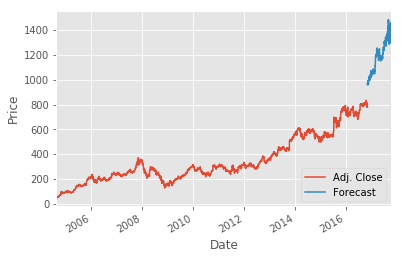

In [8]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.head())
print(df.tail())

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()